# Construimos un algoritmo que arme una red según las especificaciones
En este caso será para una red con una sola capa oculta y con la posibilidad de escoger la funcion de activación de la capa oculta así como el número de nodos que tendrá. Los nodos de las capas de entrada y salida estarán definidos por los propios datos X,Y

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class NeuralNet:
    def __init__(self, X, Y, nodos, p_split, learning_rate, epocas, fn_activation='relu'):
        self.X = X
        self.Y = Y
        self.nodos = nodos
        self.p_split = p_split
        self.learning_rate = learning_rate
        self.epocas = epocas
        
        if fn_activation == 'relu':
            self.activation = self.relu
            self.dactivation = self.drelu
        elif fn_activation == 'sigmoide':
            self.activation = self.sigmoid
            self.dactivation = self.dsigmoid
        elif fn_activation == 'tanh':
            self.activation = self.tanh
            self.dactivation = self.dtanh
        elif fn_activation == 'identidad':
            self.activation = self.iden
            self.dactivation = self.diden  

    def drelu(self, x):
        return 1. * (x > 0)

    #IDENTIDAD
    def iden(self, X):
        return X

    def diden(self, X):
        return 1

    #SIGMOIDE
    def sigmoid(self, X):
        return 1/(1.0+np.exp(-X))

    def dsigmoid(self, X):
        return sigmoid(X)*(1-sigmoid(X))

    def tanh(self, X):
        return np.tanh(X)
    
    def dtanh(self, X):
        return 1-tanh(X)**2
    # Definimos la estructura de la red
    
    def error(self, vector):
        m = len(vector)
        mse = (1/(2*m))*np.linalg.norm(vector)**2
        return mse
    
    def split(self, X, Y, p_split): #El p_split debe estar dado entre 0 y 1
        nparams = len(X)
        randomize = np.random.permutation(nparams)
        X = X[randomize]
        Y = Y[randomize]
        ntrain = int(p_split * nparams)
        indx = [ntrain]
        X_train, X_test = np.split(X, indx)
        Y_train, Y_test = np.split(Y, indx)
    
        return X_train, Y_train, X_test, Y_test
    
    def entrenar(self):
        n_entradas=len(self.X[0])
        n_salidas=len(self.Y[0])

        #definimos los conjuntos de aprendizaje y validación 
        X_learn,Y_learn,X_val,Y_val = self.split(self.X, self.Y, self.p_split)

        #forward
        W1 = np.random.randn(n_entradas,nodos)
        W2 = np.random.randn(nodos, n_salidas)
        b1 = np.random.randn(nodos)
        b2 = np.random.randn(n_salidas)

        #épocas
        errores=[]
        validacion=[]
        for i in range(epocas):
            #Forward
            z1=np.dot(X_learn,W1)+b1
            a1=activation(z1)
            z2=np.dot(a1,W2)+b2
            a2=z2

            #backpropagation
            delta2 = a2 - Y_learn
            delta1 = (delta2).dot(W2.T)*dactivation(z1)

            errores.append(self.error(delta2)) #guardamos el error de cada época

            W2 -= learning_rate * a1.T.dot(delta2)
            b2 -= learning_rate * (delta2).sum(axis=0)

            W1 -= learning_rate * X_learn.T.dot(delta1)
            b1 -= learning_rate * (delta1).sum(axis=0)

            print("Época: %d, Error: %f" %(i+1, error(delta2)))

            #Ahora validamos el modelo
            z1 = np.dot(X_val, W1) + b1
            a1 = activation(z1)
            z2 = np.dot(a1,W2)+b2
            a2 = z2
            delta = a2-Y_val
            validacion.append(error(delta))

        plt.plot(range(i+1),errores,color='darkcyan',label='Aprendizaje')
        plt.plot(range(i+1),validacion,color='darkred',label='Validación')
        plt.grid()
        plt.legend()
        self.W1 = W1
        self.W2 = W2
        self.b1 = b1
        self.b2 = b2        


    def evaluate(self):
        z1=np.dot(self.X,self.W1)+self.b1
        a1=self.activation(z1)
        z2=np.dot(a1,self.W2)+self.b2
        a2=z2
        return a2

In [8]:
#Función a emular

# X = 3.14*2*np.random.rand(1000,1)
X = np.random.rand(1000,1)
    
Y = np.abs(np.sin(X))

np.max(Y)

0.8410797175112527

In [10]:
neuralnet = NeuralNet(X, Y, nodos=100, p_split=0.8, learning_rate=1e-6, 
                           epocas=100, fn_activation='relu')

AttributeError: 'NeuralNet' object has no attribute 'relu'

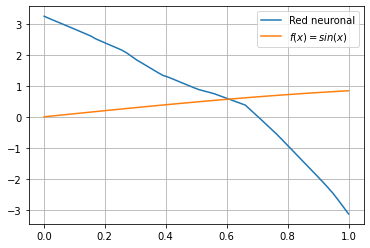

In [8]:
z = np.linspace(np.min(X), np.max(X), 60).reshape(-1, 1)

plt.plot(z, evaluate(z, W1, b1, W2, b2, relu),label='Red neuronal')
plt.plot(z, np.abs(np.sin(z)), label='$f(x)=sin(x)$')
plt.legend()
plt.grid()